In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df1 = pd.read_csv('data/round4/prices_round_4_day_1.csv', delimiter=';')
df2 = pd.read_csv('data/round4/prices_round_4_day_2.csv', delimiter=';')
df3 = pd.read_csv('data/round4/prices_round_4_day_3.csv', delimiter=';')

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
prices = combined_df[['product', 'mid_price']]

In [29]:
coconut_prices = prices[prices['product'] == 'COCONUT']
coupon_prices = prices[prices['product'] == 'COCONUT_COUPON']

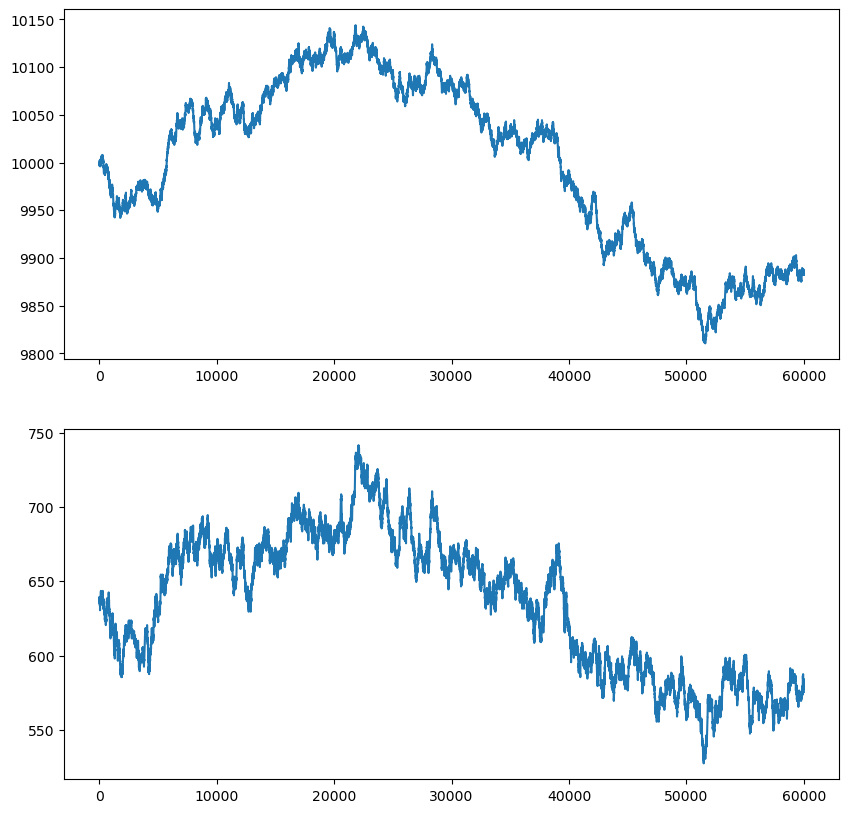

In [30]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(coconut_prices['mid_price'], label='Coconut')
axs[1].plot(coupon_prices['mid_price'], label='Coupon')

In [31]:
def calculate_rsi(data, period=500):
    delta = data.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    average_gain = up.rolling(window=period).mean()
    average_loss = abs(down.rolling(window=period).mean())

    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [32]:
coconut_prices['rsi'] = calculate_rsi(coconut_prices['mid_price'])

/tmp/ipykernel_1377/3572610765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coconut_prices['rsi'] = calculate_rsi(coconut_prices['mid_price'])


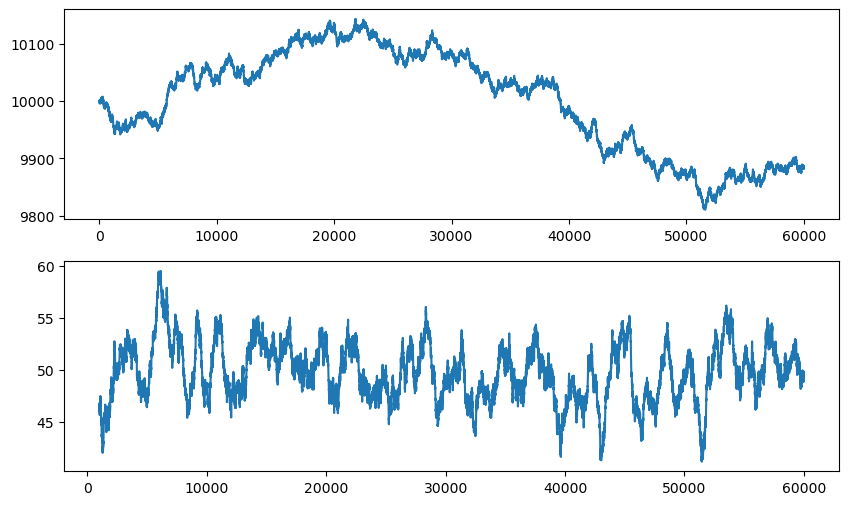

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(coconut_prices['mid_price'], label='Coconut')
axs[1].plot(coconut_prices['rsi'], label='RSI')